### Author: Annabel Wade (annawade@uw.edu)
#### Introduction
This notebook is focused on the quantum harmonic oscillator, which can be described by the following PDE boundary value problem:
$$
\frac{ d^2 \phi_n}{dx^2} - (Kx^2 - {\epsilon}_n) \phi_n = 0
$$
where the solution is $\phi_n$ and $\epsilon_n$ is the quantum energy, or eigenvalues of the system. 


0.9997357911430298
2.9990026018582294
4.998463054653262
6.997581001278019
8.996254249569033


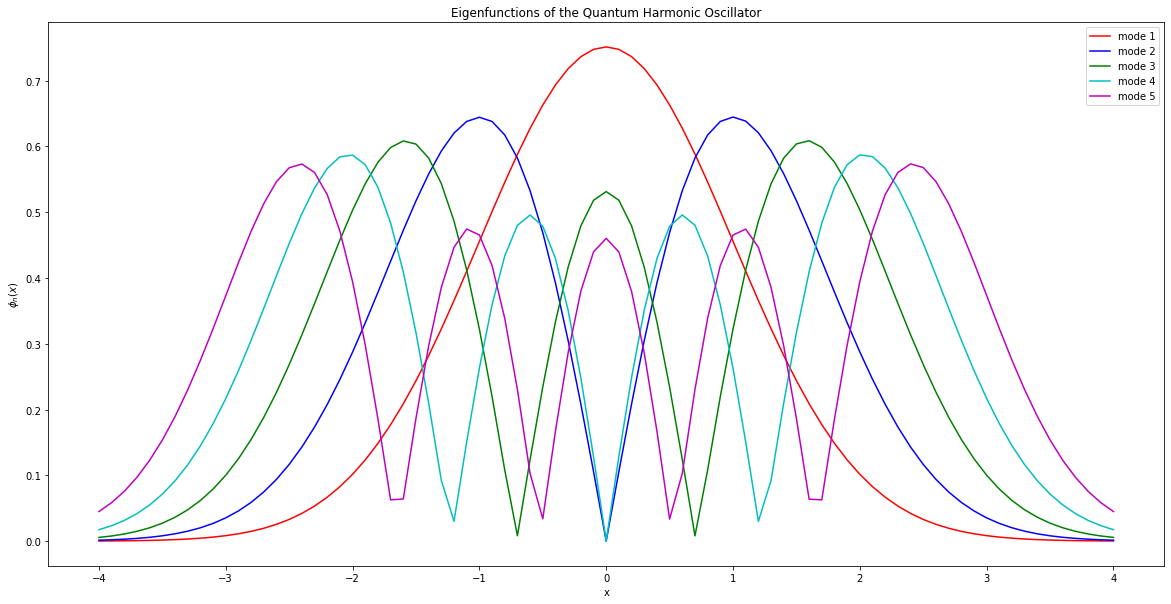

First row of A1: [0.00025602 0.00145261 0.00565784 0.0174247  0.04497165]
(81, 5) (5,)


In [1]:
# Goal: a) Calculate the first five normalized eigenfunctions (phi_n) and eigenvalues (esp_n) using a shooting scheme. 
# For this calculation, use x ∈ [−L, L] with L = 4 and choose xspan = −L : 0.1 : L

# Analysis:
# boundary condition 1 at x = -L, y2 - sqrt(L**2 - eps_n)*y1 = 0
# boundary condition 2 at x = L, y2 + sqrt(L**2 - eps_n)*y1 = 0
# eps must be less than L**2

import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# def shoot2(w, x, eps_n):
#     # kx2 is the K* x**2 values and eps_n is the quantum energy 
#     # x is the x value
#     # returns the derivative of the wavefunction
#     return [w[1], (x**2 - eps_n) * w[0]]

# define the shooting method for solve_ivp
def shoot(t, w, eps_n):
    # kx2 is the K* x**2 values and eps_n is the quantum energy 
    # x is the x value
    # returns the derivative of the wavefunction
    return [w[1], (t**2 - eps_n) * w[0]]

tol = 1e-4  # define a tolerance level
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors
L = 4
eps_n = 0.1; #[0, 1]
# look for the constant of integration A just like epsilom in the previous example
xshoot = np.arange(-L, L+0.1, 0.1) #np.linspace(-L,L, 81) #

plt.figure(figsize=(20, 10))
A1 = np.zeros((len(xshoot), 5))  # initialize the eigenfunction values
A2 = np.zeros(5)  # initialize the eigenvalues

for modes in range(1, 6):  # begin mode loop
    deps_n = 0.2  # default step size in eps_n
    for _ in range(1000):  # begin convergence loop for eps_n
        # y = odeint(shoot2, w0, xshoot, args=(eps_n,))
        w0 = [1, np.sqrt(L**2 - eps_n)]
        sol = solve_ivp(shoot, (xshoot[0], xshoot[-1]), w0, args=(eps_n,), t_eval=xshoot)
        y = sol.y.T
        bound_cond2 = y[-1, 1] + np.sqrt(L**2 - eps_n) * y[-1, 0]

        # check for convergence for second boundary condition
        if abs(bound_cond2 - 0) < tol:
            print(eps_n)  # write out eigenvalue
            # save the eigenfunction values and eigenvalues
            # A1[:, modes-1] = np.abs(y[:, 0])
            A2[modes-1] = eps_n
            break  # get out of convergence loop

        if (-1) ** (modes + 1) * bound_cond2 > 0:
            eps_n += deps_n
        else:
            eps_n -= deps_n / 2
            deps_n /= 2

    eps_n = eps_n + 0.1  # after finding eigenvalue, pick new start
    norm = np.abs(np.trapz(y[:, 0]**2, xshoot))  # normalize eigenfunction
    A1[:, modes-1] = np.abs(y[:, 0]) / np.sqrt(norm)  # save eigenfunction values
    plt.plot(xshoot, np.abs(y[:, 0]) / np.sqrt(norm), col[modes - 1], label='mode %d' % modes
             )  # plot modes

# label the x and y axes
plt.legend()  # add a legend
plt.xlabel('x')
plt.ylabel(f'$ϕ_n(x)$')
plt.title('Eigenfunctions of the Quantum Harmonic Oscillator')
plt.show()  # end mode loop

print('First row of A1:', A1[0,:])
print(A1.shape, A2.shape)  # check the shape of the eigenfunction and eigenvalue matrices
# print(A1)  # print the eigenfunction matrix
# print(A2)  # print the eigenvalue matrix


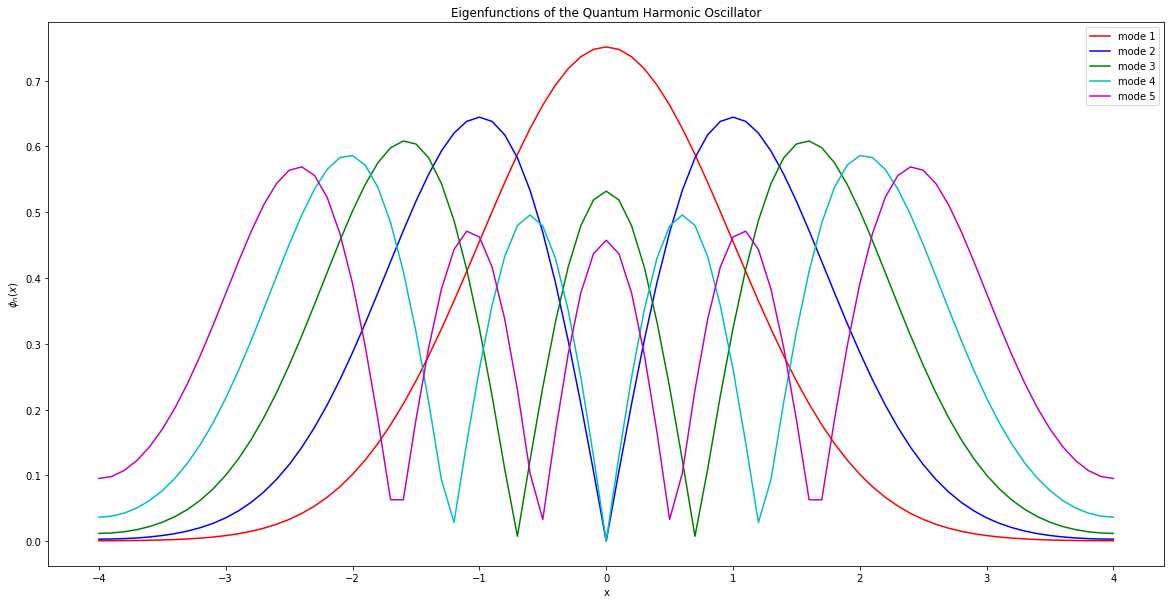

In [ ]:
# Now, calculate the first five normalized eigenfunctions (ϕn) and eigenvalues (εn) using a direct method.

tol = 1e-4  # define a tolerance level
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors
L = 4
eps_n = 0.1; w0 = [1, np.sqrt(L**2 - eps_n)] #[0, 1]
# xshoot = np.arange(-L, L+0.1, 0.1)
xshoot = np.linspace(-L, L, 81)


n = len(xshoot)
# construct matrix A for eigenvalue problem
A = np.zeros((n-2, n-2)) 

# diagonal elements
# main diagonal: -2
for ind in range(n-2): #len(xshoot)):
    A[ind, ind] = -2
    
# off diagonals: 1
for ind in range(n-3): #len(xshoot) - 1):
    A[ind, ind + 1] = 1
    A[ind + 1, ind] = 1

A[0, 1] = A[0, 1] - 1/3
A[-1, -2] = A[-1, -2] -1/3
A[0,0] = A[0,0] + 4/3
A[-1,-1] = A[-1,-1]  +4/3 


# subtract Kx^2 from the main diagonal
K = 1
A = A / 0.1**2
A = A - K * np.diag(xshoot[1:-1]**2)

from scipy.sparse.linalg import eigs
evals, evecs = eigs(A, k=5, which='SM')  

# Set the outer two vectors
evecs_with_bounds = np.vstack((4/3 * evecs[0,:] -1/3 * evecs[1,:], evecs, 4/3 * evecs[-1,:] -1/3 * evecs[-2,:]))

# set A3 and A4 to be the efuncs and evals
A3 = np.zeros((n, 5))
A4 = np.zeros(5)
for i in range(5):
    A3[:, i] = np.abs(evecs_with_bounds[:, i]) / np.sqrt(np.trapz(np.abs(evecs_with_bounds[:, i])**2, xshoot))
    A4[i] = np.abs(evals[i])

# # print
# print('evals', A4)
# print('evecs', A3)

# plot solutions
plt.figure(figsize=(20, 10))
for ind in range(5):
    plt.plot(xshoot, A3[:, ind], col[ind], label='mode %d' % (ind+1))
plt.legend()
plt.xlabel('x')
plt.ylabel(f'$ϕ_n(x)$')
plt.title('Eigenfunctions of the Quantum Harmonic Oscillator')
plt.show()

Converged A for gamma = -0.05, mode 1, A 0.10913281250000008, eps_n 0.9741210937499999


C:\Users\annab\AppData\Local\Temp\ipykernel_24932\891115764.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xshoot, np.abs(y[:, 0]) / np.sqrt(norm), col[modes - 1], label=f'γ={gamma}, mode {modes}', color='r' if gamma < 0 else 'b')  # plot modes


Converged A for gamma = -0.05, mode 2, A 0.34118750000000025, eps_n 2.893847656250002


C:\Users\annab\AppData\Local\Temp\ipykernel_24932\891115764.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(xshoot, np.abs(y[:, 0]) / np.sqrt(norm), col[modes - 1], label=f'γ={gamma}, mode {modes}', color='r' if gamma < 0 else 'b')  # plot modes


Converged A for gamma = 0.05, mode 1, A 0.11076562500000009, eps_n 1.0138427734374997
Converged A for gamma = 0.05, mode 2, A 0.34343750000000023, eps_n 2.9225830078125012


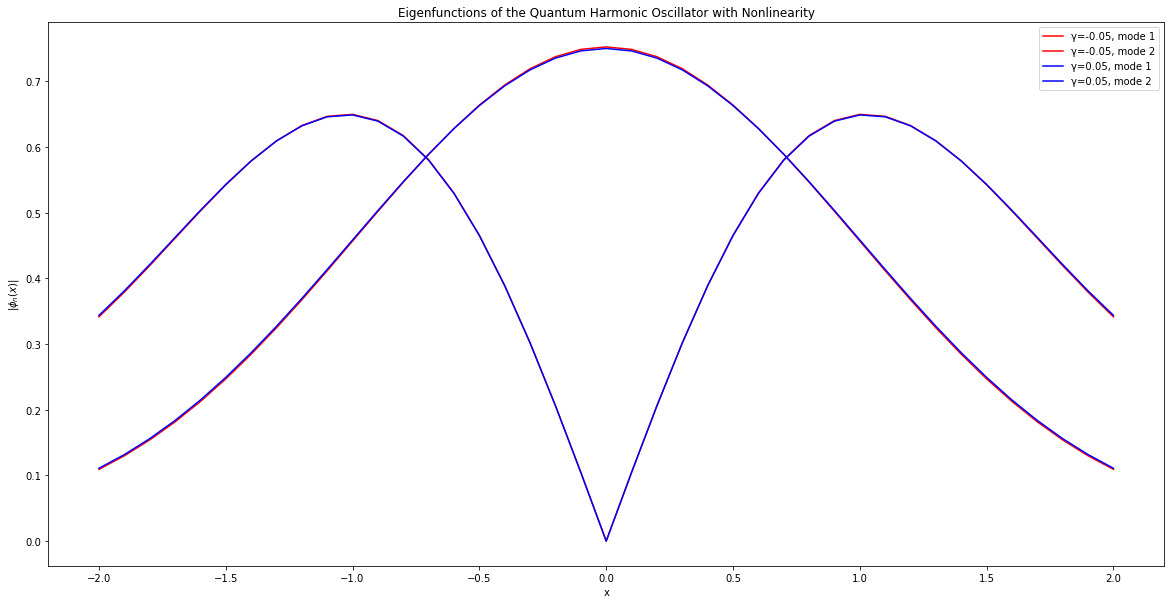

Eigenvalues for gamma = 0.05, A6: [1.01384277 2.92258301]
Eigenvalues for gamma = -0.05, A8: [0.97412109 2.89384766]


In [4]:
# In some cases, nonlinearity plays a role such that there is an additional term γ|ϕ_n|^2
# Depending upon the sign of γ, the probability density is focused or defocused. Find the first two normalized
# modes for γ = ±0.05 using shooting. 
# For this calculation, use x ∈ [−L,L] with L = 2 and choose xspan = −L : 0.1 : L. 

def shoot2(w, x, eps_n, gamma):
    # kx2 is the K* x**2 values and eps_n is the quantum energy 
    # x is the x value
    # returns the derivative of the wavefunction
    return [w[1], gamma * abs(w[0])**2 * w[0] + (x**2 - eps_n) * w[0]]

tol = 1e-4  # define a tolerance level
col = ['r', 'b', 'g', 'c', 'm', 'k']  # eigenfunc colors
L = 2
eps_n = 0.1; 
xshoot = np.arange(-L, L+0.1, 0.1)
plt.figure(figsize=(20, 10))
A5 = np.zeros((len(xshoot), 2))  # initialize the eigenfunction values
A6 = np.zeros(2)  # initialize the eigenvalues
A7 = np.zeros((len(xshoot), 2))  # initialize the eigenfunction values  
A8 = np.zeros(2)  # initialize the eigenvalues
A = 0.001 
deltaA = 0.001

for gamma in [-0.05, 0.05]:
    eps_start = 0.1
    for modes in range(1,3):  # begin mode loop
        A = 0.001 # reset A
        deltaA = 0.001
        
        for _ in range(1000):  # begin convergence loop for A
            eps_n = eps_start
            deps_n = 0.1  # default step size in eps_n

            for _ in range(1000):  # begin convergence loop for eps_n
                w0 = [A, A*np.sqrt(L**2 - eps_n)] #[0, 1]
                y = odeint(shoot2, w0, xshoot, args=(eps_n,gamma)) #solve_ivp(shoot2, y0=w0, args=(eps_n, gamma), t_span=[-L, L+0.1], t_eval=xshoot).y.T #
                bound_cond2 = y[-1, 1] + np.sqrt(L**2 - eps_n) * y[-1, 0]

                # check for convergence for second boundary condition
                if abs(bound_cond2 - 0) < tol:
                    # print(f'Converged eps_n for gamma = {gamma}, mode {modes}: {eps_n}')
                    break 
                if (-1) ** (modes + 1) * bound_cond2 > 0:
                    eps_n += deps_n
                else:
                    eps_n -= deps_n / 2
                    deps_n /= 2

            # check the norm of of the solution
            norm = np.abs(np.trapz(y[:, 0]**2, xshoot))
            if abs(norm - 1) < tol:
                if gamma < 0:
                    A7[:, modes - 1] = np.abs(y[:, 0]) / np.sqrt(norm)
                    A8[modes - 1] = eps_n
                else:
                    A5[:, modes - 1] = np.abs(y[:, 0]) / np.sqrt(norm)
                    A6[modes - 1] = eps_n
                print(f'Converged A for gamma = {gamma}, mode {modes}, A {A}, eps_n {eps_n}')
                break  # Exit outer loop if convergence is reached
            else:  # Adjust A based on the deviation from norm 1
                if norm > 1:
                    A -= deltaA  # Decrease A if norm is too large
                    deltaA /= 2  # Halve deltaA for finer adjustment
                else:
                    A += deltaA  # Increase A if norm is too small

        eps_start = eps_n + 0.5  # after finding eigenvalue, pick new start

        plt.plot(xshoot, np.abs(y[:, 0]) / np.sqrt(norm), col[modes - 1], label=f'γ={gamma}, mode {modes}', color='r' if gamma < 0 else 'b')  # plot modes

plt.legend()
plt.xlabel('x')
plt.ylabel(r'$|\phi_n(x)|$')
plt.title('Eigenfunctions of the Quantum Harmonic Oscillator with Nonlinearity')
plt.show()

# # Print the results for eigenvalues
# print("Eigenvalues for gamma = 0.05, A6:", A6)
# print("Eigenvalues for gamma = -0.05, A8:", A8)


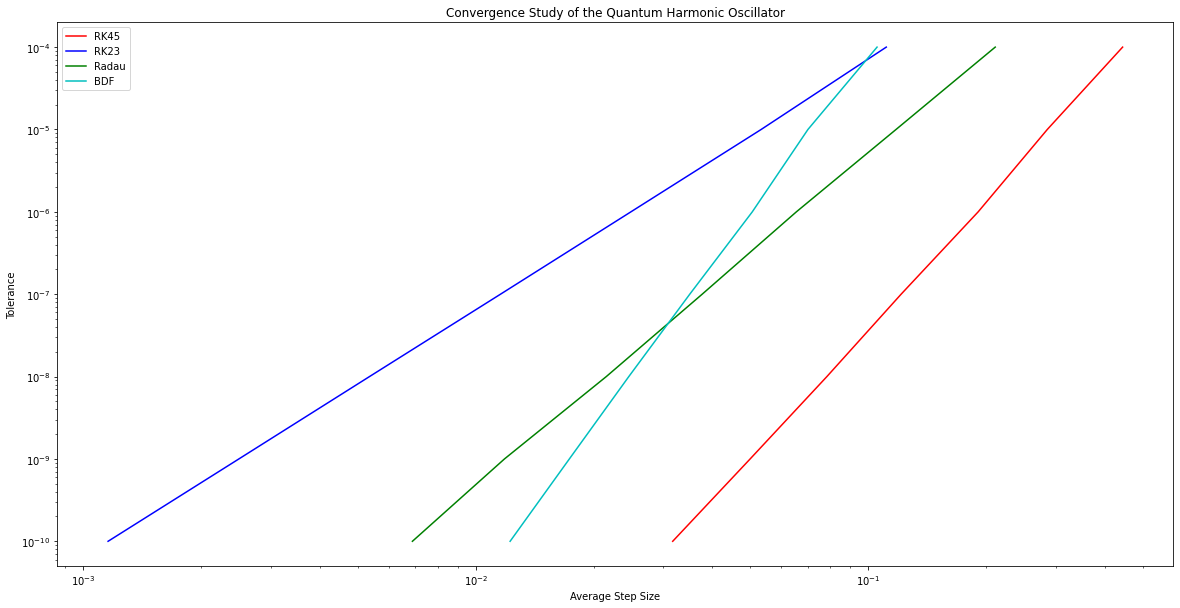

In [5]:
# For a fixed value of the energy...specifically, take εn = 1, γ = 0 with x ∈ [−L,L] and L = 2. 
# For initial launch conditions, take psi = 1 and psi_x = √(KL2 − 1) ), 
# do a convergence study by controlling the error tolerance
# options = {’rtol’: TOL, ’atol’: TOL}
# using the following methods: RK45, RK23, Radau, BDF.
# solve_ivp(hw1_rhs_a, x_span, y0, method=’RK45’, args=(E,), **options)
from scipy.integrate import solve_ivp

def rhs_a(x, y, eps_n):
    return [y[1], (x**2 - eps_n) * y[0]]

L = 2
eps_n = 1
gamma = 0
xshoot = np.arange(-L, L, 0.1)
tol_opts = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
slopes = np.zeros(4)  # initialize the slopes

fig, ax = plt.subplots(figsize=(20, 10))
for ind, (method, color) in enumerate(zip(['RK45', 'RK23', 'Radau', 'BDF'], ['r', 'b', 'g', 'c'])):
    mean_step = np.zeros(len(tol_opts))
    for ind2, tol in enumerate(tol_opts):
        # Set the tolerances
        options = {'rtol': tol, 'atol': tol}
        # Set the initial condition for the solver
        y0 = [1, np.sqrt(L**2 - eps_n)]
        # Solve the ODE
        sol = solve_ivp(rhs_a, [-L, L], y0, method=method, args=(eps_n,), **options)
        # Calculate the mean step size
        mean_step[ind2] = np.mean(np.diff(sol.t))
    # Plot the mean step size vs tolerance
    ax.loglog(mean_step, tol_opts, color=color, label=method)
    # find the slope
    slopes[ind] = np.polyfit(np.log(mean_step), np.log(tol_opts), 1)[0]

ax.legend()
ax.set_xlabel('Average Step Size')
ax.set_ylabel('Tolerance')
ax.set_title('Convergence Study of the Quantum Harmonic Oscillator')
plt.show()

In [ ]:
# Compare earlier solutions with the exact Gauss-Hermite polynomial
# solutions for this problem via error calculation of the eigenfunctions and eigenvalues.

L = 4
xshoot = np.arange(-L, L+0.1, 0.1)
x=xshoot
exact_gauss = np.zeros((len(xshoot), 5))
h = [np.ones(len(xshoot)),
     2*x, 
     4*x**2 - 2, 
     8*x**3 - 12*x, 
     16*x**4 - 48*x**2 + 12, 
    #  32*x**5 - 160*x**3 + 120*x
     ]

def factorial(n):
    result = 1
    for ind in range(1, n + 1):
        result *= ind
    return result


for ind in range(5):
    sqrt_expression= factorial(ind) * 2**ind * np.sqrt(np.pi)
    exact_gauss[:, ind] = np.abs(h[ind]) * np.exp(-x**2 / 2) / np.sqrt(sqrt_expression).T
    exact_gauss[:, ind] = np.abs(exact_gauss[:, ind])
    # Normalize the exact solution
    norm = np.abs(np.trapz(exact_gauss[:, ind]**2, xshoot))
    exact_gauss[:, ind] = np.abs(exact_gauss[:, ind]) / np.sqrt(norm)

def efunc_error(sol, exact):
    err = np.zeros(5)
    for ind in range(5):
        diff = np.abs(sol[:, ind]) - np.abs(exact[:, ind])
        integral = np.trapz(diff**2, xshoot)
        err[ind] = integral # i removed the sqrt
    return err

exact_evals = [1,3,5,7,9]

print(A1.shape, exact_gauss.shape, xshoot.shape)
A10 = efunc_error(A1, exact_gauss) 
A12 = efunc_error(A3, exact_gauss)

# compare the  eigenvalues
A11 = np.zeros(5); A13 = np.zeros(5)
for ind in range(5):
    A11[ind] = 100 * np.abs((A2[ind] - exact_evals[ind]) / exact_evals[ind])
    A13[ind] = 100 * np.abs((A4[ind] - exact_evals[ind]) / exact_evals[ind])

print('Error for eigenfunctions in part a, A10:', A10)
print('Error for eigenvalues in part a, A11:', A11)
print('Error for eigenfunctions in part b, A12:', A12)
print('Error for eigenvalues in part b, A13:', A13)

(81, 5) (81, 5) (81,)
Error for eigenfunctions in part a, A10: [4.57692817e-08 1.72430918e-07 2.47843311e-07 4.33525284e-07
 1.87100179e-06]
Error for eigenvalues in part a, A11: [0.02642089 0.0332466  0.03073891 0.03455712 0.04161945]
Error for eigenfunctions in part b, A12: [2.33908581e-07 2.39720379e-06 1.81276598e-05 1.53052855e-04
 1.24267349e-03]
Error for eigenvalues in part b, A13: [0.0626477  0.10536673 0.1718688  0.28016214 0.54888859]
